In [3]:
%matplotlib inline 

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import requests
import zipfile
import os.path
import StringIO
import pandas as pd

# BOOKS

In [5]:
bookStatsLink = 'http://language.media.mit.edu/data/public/dataset_stats_books.tsv'
bookStats = pd.read_table(bookStatsLink)
bookStats.head()

,Language,Code,TranslationsFrom,TranslationsTo,OutDegree,InDegree
0,Abaza,abq,10,8,3,1
1,Abidji,abi,0,6,0,2
2,Abkhazian,abk,171,115,20,15
3,Achi,acr,4,2,2,1
4,Acoli,ach,3,0,3,0


### Top 10 Languages biggest difference in OutDegree vs. InDegree

In [6]:
bookStats['Difference InDegree/OutDegree'] = abs(bookStats.OutDegree-bookStats.InDegree)
bookStatsDifferenceTop10 = bookStats.sort_values(by='Difference InDegree/OutDegree', ascending=False).reset_index(drop=True)[:10]
bookStatsDifferenceTop10.head()

,Language,Code,TranslationsFrom,TranslationsTo,OutDegree,InDegree,Difference InDegree/OutDegree
0,Ancient Greek (to 1453),grc,17342,22,378,8,370
1,Hebrew,heb,9889,10961,205,47,158
2,English,eng,1225237,146294,338,427,89
3,German,deu,201718,292124,164,217,53
4,Sanskrit,san,4282,58,68,16,52


### Top 10 Total Translations 

In [7]:
bookStats['Total Translations'] = bookStats.TranslationsFrom + bookStats.TranslationsTo
totalTranslations = bookStats.loc[:,["Language", "Code","TranslationsFrom", "TranslationsTo", "Total Translations"]]
totalTranslationsTop10 = totalTranslations.sort_values(by='Total Translations', ascending=False).reset_index(drop=True)[:10]
totalTranslationsTop10.head()

,Language,Code,TranslationsFrom,TranslationsTo,Total Translations
0,English,eng,1225237,146294,1371531
1,German,deu,201718,292124,493842
2,French,fra,216624,238463,455087
3,Spanish,spa,52955,228910,281865
4,Russian,rus,101395,82772,184167


# TWITTER

In [8]:
twitterStatsLink = 'http://language.media.mit.edu/data/public/dataset_stats_twitter.tsv'
twitterStats = pd.read_table(twitterStatsLink)
twitterStats.head()

,Language,Code,Tweets,Users,Avg. tweets per user,Tweets by multilinguals,Multilinguals,Avg. tweets per multilingual user,Total users,Total multilinguals
0,Afrikaans,afr,69009,24782,2.784642,67775,24640,2.750609,17694811,3275235
1,Albanian,sqi,26682,5155,5.175946,18237,4807,3.793842,17694811,3275235
2,Amharic,amh,279,16,17.437500,224,11,20.363636,17694811,3275235
3,Arabic,ara,9993172,366643,27.255865,4013588,119350,33.628722,17694811,3275235
4,Armenian,hye,6391,253,25.260870,1771,140,12.650000,17694811,3275235


### Top 10 talen met de meeste tweets

In [9]:
tweetLanguageTop10 = twitterStats.sort_values(by='Tweets', ascending=False).reset_index(drop=True)[:10]
tweetLanguageTop10.head()

,Language,Code,Tweets,Users,Avg. tweets per user,Tweets by multilinguals,Multilinguals,Avg. tweets per multilingual user,Total users,Total multilinguals
0,English,eng,255351176,10859465,23.514158,40902582,3129456,13.070189,17694811,3275235
1,Japanese,jpn,91669691,2602426,35.224706,14746645,124833,118.130983,17694811,3275235
2,Malay (macrolanguage),msa,49546710,1651705,29.997312,39692200,1033758,38.396027,17694811,3275235
3,Portuguese,por,46520572,1617409,28.762405,31866460,708142,45.000099,17694811,3275235
4,Spanish,spa,44195979,2043468,21.627928,24331382,769887,31.603835,17694811,3275235


# WIKIPEDIA

In [10]:
wikiStatsLink = 'http://language.media.mit.edu/data/public/dataset_stats_wikipedia.tsv'
wikiStats = pd.read_table(wikiStatsLink)
wikiStats.head()

,Language,Code,Edits,Editors,Avg. edits per editor,Edits by mulitlinguals,Multilinguals,Avg. edits per multilingual editor,Total editors,Total multilinguals
0,Abkhazian,abk,2807,15,187.133333,1494,7,213.428571,2562860,279172
1,Afar,aar,46,4,11.500000,9,3,3.000000,2562860,279172
2,Afrikaans,afr,103652,511,202.841487,95988,352,272.693182,2562860,279172
3,Akan,aka,327,31,10.548387,240,24,10.000000,2562860,279172
4,Albanian,sqi,196685,1996,98.539579,137800,1083,127.239150,2562860,279172


In [11]:
wikiLanguageTop10 = wikiStats.sort_values(by='Edits', ascending=False)[:10]
wikiLanguageTop10.head()

,Language,Code,Edits,Editors,Avg. edits per editor,Edits by mulitlinguals,Multilinguals,Avg. edits per multilingual editor,Total editors,Total multilinguals
51,English,eng,198361048,1589250,124.814251,78341211,218320,358.836621,2562860,279172
68,German,deu,33977378,224215,151.539273,19229693,70281,273.611545,2562860,279172
62,French,fra,23070757,142795,161.565580,12737133,45439,280.312793,2562860,279172
89,Japanese,jpn,16149315,102857,157.007447,4341051,18578,233.666218,2562860,279172
192,Spanish,spa,13645596,145487,93.792545,7554652,41700,181.166715,2562860,279172


In [12]:
wikiNodesLink = 'http://language.media.mit.edu/data/public/wikipedia_nodes.tsv'
wikiNodes = pd.read_table(wikiNodesLink)
wikiNodes.head()

,Language,ABS(Eigenvector),Popfrom,Popto
0,aar,0.000000,5,5
1,abk,0.000000,9,9
2,afr,0.002231,776,776
3,aka,0.000000,183,183
4,amh,0.000218,81,81


In [13]:
wikiEdgesLink = 'http://language.media.mit.edu/data/public/wikipedia_edges.tsv'
wikiEdges = pd.read_table(wikiEdgesLink)
wikiEdges.head()

,SourceLanguageCode,TargetLanguageCode,SourceLanguageName,TargetLanguageName,SourcePopulation,TargetPopulations,Coocurrences,PhiCorrelation,Tstatistic
0,afr,eng,Afrikaans,English,776,273987,271,0.013648,17.207148
1,afr,nld,Afrikaans,Dutch,776,26888,78,0.015377,3.332197
2,amh,eng,Amharic,English,81,273987,28,0.004344,5.476711
3,ang,eng,Old English (ca. 450-1100),English,135,273987,51,0.006363,8.021067
4,ara,deu,Arabic,German,6361,103768,446,0.007497,3.550224


In [14]:
wikiEdgesTop10 = wikiEdges.sort_values(by='Coocurrences', ascending=False).reset_index(drop=True)[:10]
wikiEdgesTop10.head()

,SourceLanguageCode,TargetLanguageCode,SourceLanguageName,TargetLanguageName,SourcePopulation,TargetPopulations,Coocurrences,PhiCorrelation,Tstatistic
0,deu,eng,German,English,103768,273987,49637,0.246934,321.246726
1,eng,deu,English,German,273987,103768,49637,0.246934,321.246726
2,eng,fra,English,French,273987,69366,31625,0.188388,241.822348
3,fra,eng,French,English,69366,273987,31625,0.188388,241.822348
4,eng,spa,English,Spanish,273987,58791,28908,0.190817,245.057332


In [15]:
famousWikiStatsLink = 'http://language.media.mit.edu/data/public/Famous_wikipedia_by_language.tsv'
famousWikiStats = pd.read_table(famousWikiStatsLink)
famousWikiStats.head()

,lang,exports_1800_1950,exports_all_years
0,eng,1617.773,3300.798
1,deu,524.098,929.088
2,fra,455.511,997.700
3,spa,305.482,774.644
4,rus,272.908,429.380


### Total Translations and Common Wikipedia Editors

In [16]:
famousWikiStats = famousWikiStats.rename(columns={'lang': 'Code'})
booksAndFamousIndividuals = pd.merge(totalTranslations, famousWikiStats, on=['Code'])
booksAndFamousIndividuals.head()

,Language,Code,TranslationsFrom,TranslationsTo,Total Translations,exports_1800_1950,exports_all_years
0,Afrikaans,afr,357,776,1133,4.137,6.9405
1,Akan,aka,2,2,4,0.988,4.1990
2,Albanian,sqi,1424,6757,8181,8.343,26.8710
3,Amharic,amh,58,317,375,1.758,2.9300
4,Arabic,ara,11884,12488,24372,94.456,273.0680


### Top 100 Total Translations and Common Wikipedia Editors sorted by Total Translations

In [18]:
booksAndFamousIndividualsTop100 = booksAndFamousIndividuals.sort_values(by='Total Translations', ascending=False)[:100]
booksAndFamousIndividualsTop100.head()

,Language,Code,TranslationsFrom,TranslationsTo,Total Translations,exports_1800_1950,exports_all_years
26,English,eng,1225237,146294,1371531,1617.773,3300.798
40,German,deu,201718,292124,493842,524.098,929.088
34,French,fra,216624,238463,455087,455.511,997.700
107,Spanish,spa,52955,228910,281865,305.482,774.644
92,Russian,rus,101395,82772,184167,272.908,429.380


### Scatterplot Total Translations vs. Common Wikipedia Editors (Top 100 TotalTranslations)

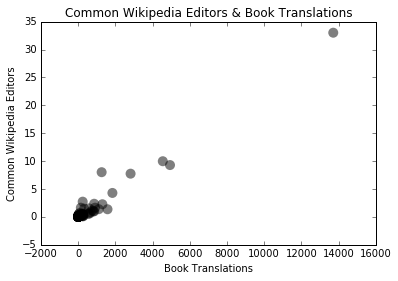

In [22]:
total_translations = booksAndFamousIndividualsTop100['Total Translations'].values
common_wikipedia = booksAndFamousIndividualsTop100.exports_all_years.values
scale_factor = 100.0

X = np.divide(total_translations, scale_factor)
Y = np.divide(common_wikipedia, scale_factor)

plt.scatter(X,Y, c='black', s=100, alpha=0.5, edgecolors='none')

plt.title('Common Wikipedia Editors & Book Translations')    
plt.xlabel('Book Translations')
plt.ylabel('Common Wikipedia Editors')
plt.show()

### Drop English  
##### (want is een outlier)

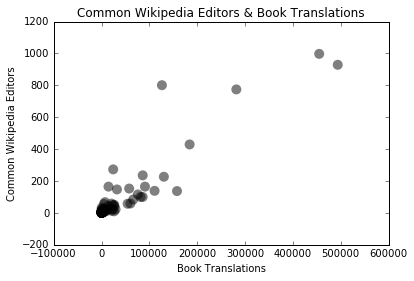

In [73]:
total_translationsDropEnglish = booksAndFamousIndividualsTop100['Total Translations'].values[1:]
common_wikipediaDropEnglish = booksAndFamousIndividualsTop100.exports_all_years.values[1:]

X = total_translationsDropEnglish
Y = common_wikipediaDropEnglish

plt.scatter(X,Y, c='black', s=100, alpha=0.5, edgecolors='none')

plt.title('Common Wikipedia Editors & Book Translations')    
plt.xlabel('Book Translations')
plt.ylabel('Common Wikipedia Editors')
plt.show()

# Total Activity (Books + Twitter + Wikipedia)

In [183]:
totalActivity = twitterStats.merge(wikiStats,on='Language').merge(bookStats,on='Language')
totalActivity = totalActivity.loc[:,["Language", "Edits", "Tweets", "TranslationsFrom", "TranslationsTo"]].fillna(0)
totalActivity['Total Activity'] = totalActivity.Edits + totalActivity.Tweets+ totalActivity.TranslationsFrom + totalActivity.TranslationsTo
totalActivity.head()

,Language,Edits,Tweets,TranslationsFrom,TranslationsTo,Total Activity
0,Afrikaans,103652,69009,357,776,173794
1,Albanian,196685,26682,1424,6757,231548
2,Amharic,4596,279,58,317,5250
3,Arabic,2178719,9993172,11884,12488,12196263
4,Armenian,65797,6391,1100,2139,75427


### Total Activity Top 10

In [181]:
totalActivityTop10= allActivity.sort_values(by='Total Activity', ascending=False).reset_index(drop=True)[:10]
totalActivityTop10.head()

,Language,Edits,Tweets,TranslationsFrom,TranslationsTo,Total Activity
0,English,198361048,255351176,1225237,146294,455083755
1,Japanese,16149315,91669691,26921,130893,107976820
2,Spanish,13645596,44195979,52955,228910,58123440
3,Portuguese,5168734,46520572,11390,74721,51775417
4,Malay (macrolanguage),969369,49546710,485,5416,50521980


### Plot Total Activity Top 10

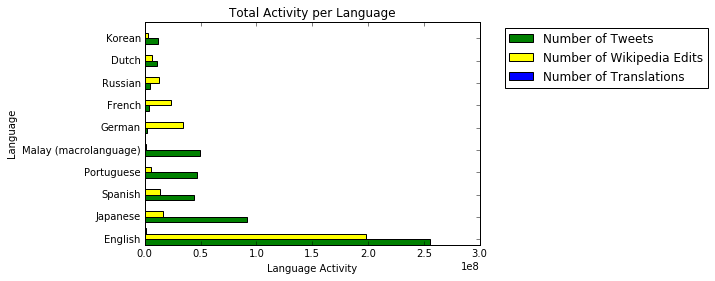

In [179]:
languages_top10 = totalActivityTop10['Language'].values
tweets_top10 = totalActivityTop10['Tweets'].values
wiki_top10 = totalActivityTop10['Edits'].values
books_top10 = totalActivityTop10['TranslationsFrom'].values+totalActivityTop10['TranslationsTo'].values

lenBars = len(totalactivity_top10)
index = np.arange(lenBars)
barWidth = 0.25

# 3 bars
plt.barh(index, tweets_top10, barWidth, label='Number of Tweets', color='green')
plt.barh(index+barWidth, wiki_top10, barWidth, label='Number of Wikipedia Edits', color='yellow')
plt.barh(index+barWidth*2, books_top10, barWidth, label='Number of Translations', color='blue')

# Labels
plt.xlabel('Language Activity')
plt.ylabel('Language')
plt.title('Total Activity per Language')
plt.yticks(index + barWidth, languages_top10)
plt.legend(bbox_to_anchor=(1.7, 1))

plt.show()

In [7]:
centralitiesStatsLink = 'http://language.media.mit.edu/data/public/centralities_by_language.tsv'
centralitiesStats = pd.read_table(centralitiesStatsLink)
centralitiesStats.head()

,language.name,language.code,twitter.eigenvector,wikipedia.eigenvector,books.eigenvector,twitter.betweeness,wikipedia.betweeness,books.betweeness
0,Abaza,abq,NaN,NaN,0.000005,NaN,NaN,0
1,Abkhazian,abk,NaN,NaN,0.000069,NaN,NaN,0
2,Adyghe,ady,NaN,NaN,0.000046,NaN,NaN,0
3,Afrikaans,afr,0.011718,0.002231,0.000861,0,0,579
4,Akkadian,akk,NaN,NaN,0.000212,NaN,NaN,0


In [27]:
centralitiesStatsTop10 = centralitiesStats.sort_values(by='twitter.eigenvector', ascending=False).reset_index(drop=True).fillna(0)[:10]
centralitiesStatsTop10.head()

,language.name,language.code,twitter.eigenvector,wikipedia.eigenvector,books.eigenvector,twitter.betweeness,wikipedia.betweeness,books.betweeness
0,English,eng,0.693295,0.659298,0.898035,3051,15782,17006
1,Malay (macrolanguage),msa,0.485596,0.025246,0.001315,122,864,1183
2,Portuguese,por,0.352087,0.109868,0.021052,628,0,0
3,Spanish,spa,0.348114,0.287463,0.085400,594,982,1531
4,Filipino (macrolanguage),fil,0.133164,0.003755,0.000459,136,0,0
